In [1]:
from scoobpsf.math_module import xp, _scipy, ensure_np_array
import scoobpsf.utils as utils
from scoobpsf.imshows import imshow1, imshow2, imshow3
import scoobpsf.props as props
import scoobpsf.dm as dm

import numpy as np
import astropy.units as u
from matplotlib.patches import Circle

import lina

from importlib import reload

npix = 1000
dm_pupil_diam = 9.2*u.mm
act_spacing = 300e-6*u.m
pupil_pxscl = dm_pupil_diam.to_value(u.m)/npix
sampling = act_spacing.to_value(u.m)/pupil_pxscl

Nact = 34

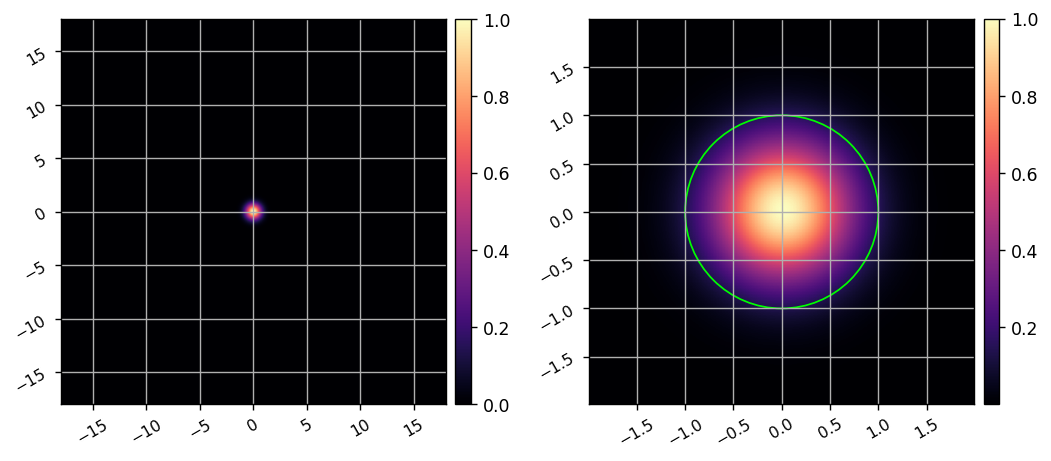

In [2]:
reload(dm)
inf = dm.make_gaussian_inf_fun(act_spacing=act_spacing, sampling=sampling, coupling=0.15, Nact=Nact+2)
DM = dm.DeformableMirror(inf_fun=inf, inf_sampling=sampling, name='DM (pupil)')
imshow2(DM.inf_fun, DM.inf_fun,
        pxscl=1/DM.inf_sampling, grid=True,
        npix2=int(np.round(4*DM.inf_sampling)),
        patches2=[Circle((0,0), 1, fill=False, color='lime')])

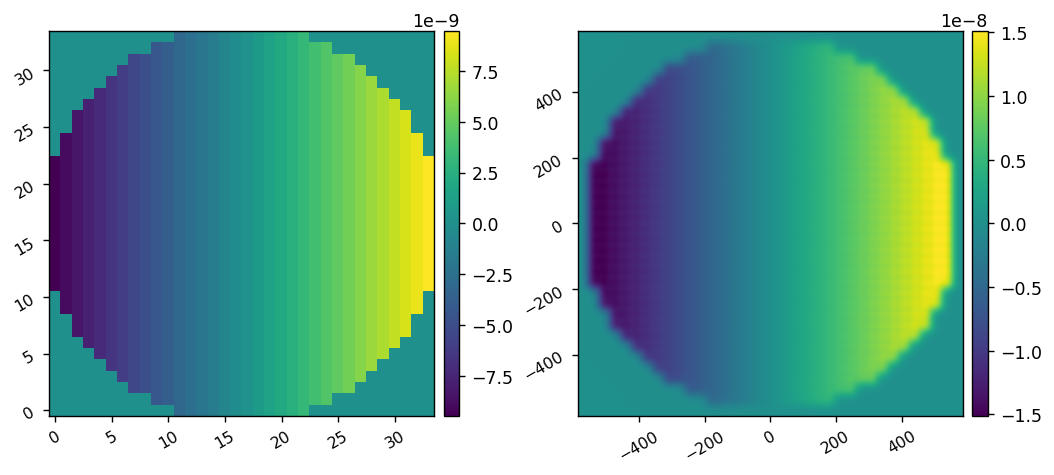

In [3]:
reload(dm)

dm_zernikes = lina.utils.create_zernike_modes(DM.dm_mask, nmodes=2, remove_modes=1)
i = 0
DM.command = 5e-9 * dm_zernikes[i]
dm_surf = DM.get_surface()
imshow2(DM.command, dm_surf, cmap1='viridis', cmap2='viridis', pxscl2=1)


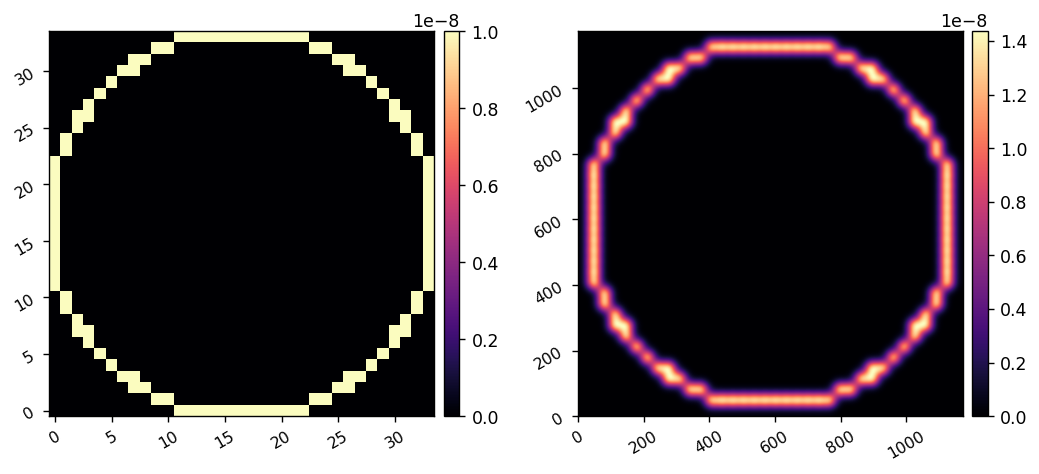

In [4]:
ring = (Nact//2-1/2<DM.rc) * (DM.rc < Nact//2+1/2)
ring = ring.astype(float)
ring *= 1e-8

DM.command = xp.array(ring)

surf = DM.get_surface()
imshow2(ring, surf)

Oversampling > 2x suggested for reliable results in Fresnel propagation.


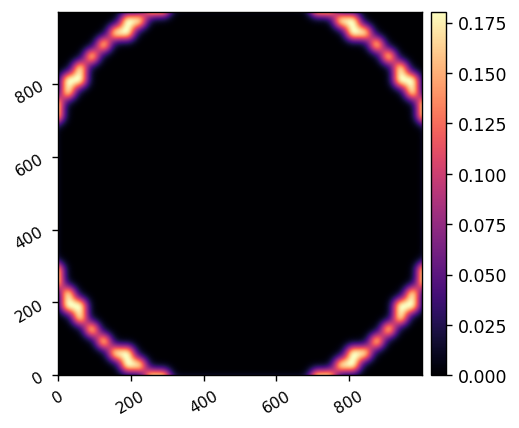

In [5]:
import poppy
pwf = poppy.FresnelWavefront(beam_radius=dm_pupil_diam/2, npix=npix, oversample=1) # pupil wavefront
ap = poppy.CircularAperture(radius=dm_pupil_diam/2).get_transmission(pwf)
pwf *= DM

imshow1(pwf.phase)